Identify person of interests in Enron Scandal
------------------------------------------

financial features: ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred','deferred_income','total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive','restricted_stock', 'director_fees'] (all units are in US dollars)                                                                                                                                

email features: ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi','shared_receipt_with_poi'] (units are generally number of emails messages; notable exception is ‘email_address’, which is a text string)  

In [73]:
#!/usr/bin/python                                                                                                                                

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.                                                                                                     
### features_list is a list of strings, each of which is a feature name.                                                                         
### The first feature must be "poi".                                          

features_list = ['poi','salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred',\
                 'deferred_income','total_stock_value', 'expenses', 'exercised_stock_options', 'other',\
                 'long_term_incentive', 'restricted_stock', 'director_fees',\
                 'to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi',\
                 'shared_receipt_with_poi']  # You will need to use more features                                                                            

### Load the dictionary containing the dataset                                                                                                   
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
    

In [74]:
print data_dict

{'METTS MARK': {'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'exercised_stock_options': 'NaN', 'bonus': 600000, 'restricted_stock': 585062, 'shared_receipt_with_poi': 702, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'loan_advances': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 'NaN', 'email_address': 'mark.metts@enron.com', 'from_poi_to_this_person': 38}, 'BAXTER JOHN C': {'salary': 267102, 'to_messages': 'NaN', 'deferral_payments': 1295738, 'total_payments': 5634343, 'exercised_stock_options': 6680544, 'bonus': 1200000, 'restricted_stock': 3942714, 'shared_receipt_with_poi': 'NaN', 'restricted_stock_deferred': 'NaN', 'total_stock_value': 10623258, 'expenses': 11200, 'loan_advances': 'NaN', 'from_messages': 'NaN', 'other': 2660303, 'from_this_person_to_poi': 'NaN', 'poi': False, 'direct

In [75]:
print "Total length of data:\t",len(data_dict)
print data_dict['METTS MARK']
print "For each person, how many features are available?",len(data_dict['METTS MARK'])

print "How many POIs are in the dataset?"
poict=0
nonpoict=0
for name in data_dict:
    if data_dict[name]['poi']==True:
        poict+=1
    elif data_dict[name]['poi']==False:
        nonpoict+=1
    else:
        neightherone=1
       
        
print "Number of POIs:\t",poict
print "Number of nonPOIs:\t",nonpoict

Total length of data:	146
{'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'exercised_stock_options': 'NaN', 'bonus': 600000, 'restricted_stock': 585062, 'shared_receipt_with_poi': 702, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'loan_advances': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 'NaN', 'email_address': 'mark.metts@enron.com', 'from_poi_to_this_person': 38}
For each person, how many features are available? 21
How many POIs are in the dataset?
Number of POIs:	18
Number of nonPOIs:	128


In [76]:
allfeatures = ['poi','salary','to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options',\
                 'bonus', 'restricted_stock','restricted_stock_deferred', 'loan_advances',\
                'deferred_income','total_stock_value', 'expenses', 'other', 'long_term_incentive',\
                 'director_fees', 'from_poi_to_this_person', 'from_messages',\
                'from_this_person_to_poi','shared_receipt_with_poi', 'email_address'] 

ct=[0] * 21
for name in data_dict:   
    for j in range(0,21):
        if data_dict[name][allfeatures[j]]!='NaN':
            ct[j-1]+=1

            
print "Numbers of non NaN data in each feature?"   
for i in range(0,21):
    print  ct[i-1],"\t", allfeatures[i] 
    

Numbers of non NaN data in each feature?
146 	poi
95 	salary
86 	to_messages
39 	deferral_payments
125 	total_payments
102 	exercised_stock_options
82 	bonus
110 	restricted_stock
18 	restricted_stock_deferred
4 	loan_advances
49 	deferred_income
126 	total_stock_value
95 	expenses
93 	other
66 	long_term_incentive
17 	director_fees
86 	from_poi_to_this_person
86 	from_messages
86 	from_this_person_to_poi
86 	shared_receipt_with_poi
111 	email_address


We can see that several features have missing elements. Let's drop the features with <73 non NaN elements. 

In [77]:
features_list=[]
for i in range(0,21):
    if ct[i-1]>73:
        a=allfeatures[i]
        features_list.append(a)

print len(features_list),features_list

15 ['poi', 'salary', 'to_messages', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'total_stock_value', 'expenses', 'other', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi', 'email_address']


We should visualize the raw data before we handle outliers and select features. Prior to that, I first convert dictionary to numpy array of features. 

In [81]:
import numpy as np

def featureFormat(dictionary,features,remove_NaN=True,remove_all_zeros=True,remove_any_zeros=False,sort_keys=False):
    return_list=[]
    if sort_keys:
        keys=sorted(dictionary.keys())
    else:
        keys=dictionary.keys()
        
    for key in keys:
        tmp_list=[]
        for feature in features:
            try:
                dictionary[key][feature]
            except KeyError:
                print "error: key ",feature," not present"
                return
            value=dictionary[key][feature]
            if value=="NaN" and remove_NaN:
                value=0
            tmp_list.append(float(value))
        
        #Logic for deciding whether or not to add the data point.
        append=True
        #exclude 'poi' class as criteria.
        if features[0]=='poi':
            test_list=tmp_list[1:]
        else:
            test_list=tmp_list
        #if all feature are zero and you want to remove all zero
        if remove_all_zeros:
            append=False
            for item in test_list:
                if item!=0 and item!="NaN":
                    append=True
                    break
        #if any features for a given data point are zero
        #and you want to remove data point with any zeros.
        if remove_any_zeros:
            if 0 in test_list or "NaN" in test_list:
                append=False
                
        #append the data point if flagged for addition
        if append:
            return_list.append(np.array(tmp_list))
    
    return np.array(return_list)
        
        

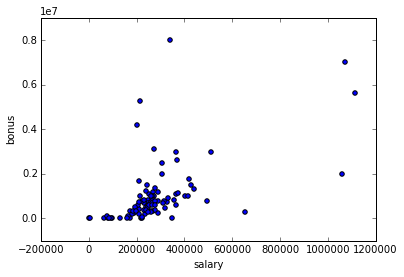

In [90]:
### Task 2: Remove outliers 
import matplotlib.pyplot as plt
%matplotlib inline
dfeatures=['salary','bonus']
#remove a key-value pair (with abnormally high salary and bonus) from a dictionary
data_dict.pop('TOTAL',0) 

def drawXY(data_dict,dfeatures):
    data=featureFormat(data_dict,dfeatures)
    for point in data:
        X=point[0]
        Y=point[1]
        plt.scatter(X,Y)
        
    plt.xlabel(dfeatures[0])
    plt.ylabel(dfeatures[1])
    plt.show()

drawXY(data_dict,dfeatures)

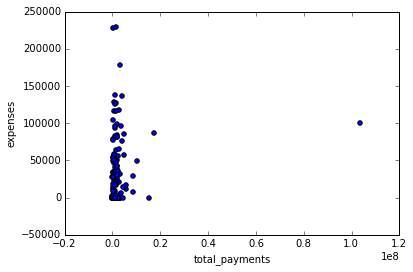

In [94]:
dfeatures=['total_payments','expenses']
drawXY(data_dict,dfeatures)

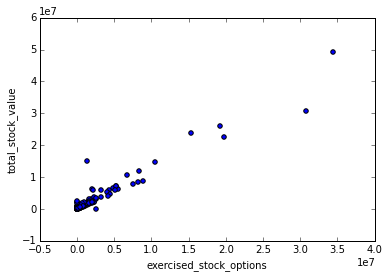

In [93]:
dfeatures=['exercised_stock_options','total_stock_value']
drawXY(data_dict,dfeatures)

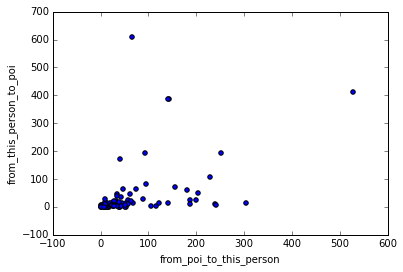

In [95]:
dfeatures=['from_poi_to_this_person','from_this_person_to_poi']
drawXY(data_dict,dfeatures)

In [62]:
features_list

['poi',
 'salary',
 'to_messages',
 'total_payments',
 'exercised_stock_options',
 'bonus',
 'restricted_stock',
 'total_stock_value',
 'expenses',
 'other',
 'from_poi_to_this_person',
 'from_messages',
 'from_this_person_to_poi',
 'shared_receipt_with_poi',
 'email_address']

In [ ]:
### Task 3: Create new feature(s)                                                                                                                
### Store to my_dataset for easy export below.                                                                                                   
my_dataset = data_dict

### Extract features and labels from dataset for local testing                                                                                   
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers                                                                                                          
### Please name your classifier clf for easy export below.                                                                                       
### Note that if you want to do PCA or other multi-stage operations,  
### you'll need to use Pipelines. For more info:                                                                                                 
### http://scikit-learn.org/stable/modules/pipeline.html                                                                                         

# Provided to give you a starting point. Try a variety of classifiers.                                                                           
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

### Task 5: Tune your classifier to achieve better than .3 precision and recall                                                                  
### using our testing script. Check the tester.py script in the final project                                                                    
### folder for details on the evaluation method, especially the test_classifier                                                                  
### function. Because of the small size of the dataset, the script uses            
### stratified shuffle split cross validation. For more info:                                                                                    
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html                                        

# Example starting point. Try investigating other evaluation techniques!                                                                         
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

### Task 6: Dump your classifier, dataset, and features_list so anyone can                                                                       
### check your results. You do not need to change anything below, but make sure                                                                  
### that the version of poi_id.py that you submit can be run on its own and                                                                      
### generates the necessary .pkl files for validating your results.                                                                              

dump_classifier_and_data(clf, my_dataset, features_list)